# Video 1 - What is feature engineering

Feature engineering is a process of extracting useful features from raw data using math, statistics and domain knowledge

# Video 2 - Outlier Detection and Removal using Percentile

In [30]:
import pandas as pd

df = pd.read_csv('heights.csv')
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [31]:
max_thresold = df['height'].quantile(0.95)
max_thresold

np.float64(9.689999999999998)

In [32]:
df[df['height']> max_thresold]

,name,height
9,imran,14.5


In [33]:
min_thresold = df['height'].quantile(0.05)
min_thresold

np.float64(3.6050000000000004)

In [34]:
df[df['height'] < min_thresold]

,name,height
12,yoseph,1.2


In [35]:
df[(df['height'] < max_thresold) & (df['height'] > min_thresold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [36]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [37]:
df.shape

(13200, 7)

In [48]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [49]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [50]:
df4 = df[df.price_per_sqft < min_threshold]
df4.shape

(14, 7)

In [51]:
df3 = df[df.price_per_sqft>max_threshold]
df3.shape

(14, 7)

In [52]:
df2 = df[(df.price_per_sqft < max_threshold) & (df.price_per_sqft > min_threshold)]
df2.shape

(13172, 7)

In [53]:
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [55]:
df2.sample(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
138,Hennur Road,8 Bedroom,5000.0,8.0,250.00,8,5000
10987,JP Nagar,2 BHK,1250.0,2.0,93.00,2,7440
1669,Hebbal,2 BHK,1080.0,2.0,54.00,2,5000
10015,Electronics City Phase 1,2 BHK,1000.0,2.0,28.00,2,2800
2235,Sarjapur Road,3 BHK,1819.0,3.0,100.00,3,5497
3724,Electronic City,2 BHK,1090.0,2.0,31.49,2,2888
3726,Haralur Road,2 BHK,1088.0,2.0,68.00,2,6250
4733,Begur Road,3 BHK,1565.0,2.0,59.76,3,3818
9623,JP Nagar,4 Bedroom,1500.0,2.0,87.00,4,5800
10989,Hebbal,4 BHK,4600.0,6.0,650.00,4,14130


#Execise 2

In [56]:
import pandas as pd

df = pd.read_csv('AB_NYC_2019 (2).csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [57]:
df.shape

(48895, 16)

In [58]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [61]:
min_threshold, max_threshold = df.price.quantile([0.001, 0.999])
min_threshold, max_threshold

(18.0, 3000.0)

In [63]:
df1 = df[df.price < min_threshold]
df1.shape

(48, 16)

In [64]:
df2 = df[df.price > max_threshold]
df2.shape

(45, 16)

In [65]:
df3 = df[(df.price < max_threshold) & (df.price > min_threshold)]
df3.shape

(48792, 16)

In [67]:
df3.sample(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19509,15581948,Comfortable Private Room in Historic Park Slope,66602200,Marie-Line,Brooklyn,Park Slope,40.67688,-73.97602,Private room,100,2,131,2019-06-25,3.97,1,126
27018,21385255,Private Master Bedroom in the Lower East Side,118421882,Natalie,Manhattan,Chinatown,40.71541,-73.99083,Private room,95,1,132,2019-06-22,6.45,1,27
45236,34621157,Comfortable Private Room & Bathroom En-suite,261187437,Shasha,Brooklyn,Borough Park,40.63540,-74.00576,Private room,75,1,2,2019-05-23,1.07,6,151
23079,18688150,"""Chill"" Private 1BR Close to A,C,B,D,2,3",24906403,Howard,Manhattan,Harlem,40.81800,-73.94134,Private room,60,2,51,2019-07-05,2.26,1,170
26355,20996830,"Perfect SOHO/NOLITA location, CLEAN and cozy home",144857346,Grace,Manhattan,Nolita,40.72408,-73.99381,Private room,111,1,51,2019-06-09,2.39,3,56
3168,1887874,"Big, bright, Williamsburg bedroom",9820312,Brandon,Brooklyn,Williamsburg,40.70711,-73.94457,Private room,40,7,0,NaN,NaN,1,331
43620,33766115,Cozy West Village apt,5549854,Maja,Manhattan,West Village,40.73684,-74.00844,Entire home/apt,170,4,2,2019-06-16,1.36,1,5
7722,5847182,Lefferts Gardens Brooklyn Room,30357478,Ingrid,Brooklyn,East Flatbush,40.65406,-73.95060,Private room,20,1,0,NaN,NaN,1,0
4402,2984662,Brooklyn Heights - 1 Bedroom,15179425,Chris,Brooklyn,Brooklyn Heights,40.69443,-73.99068,Entire home/apt,150,2,10,2018-09-14,0.16,1,0
30290,23393043,Awesome Modern Oasis 2 Bdrm Apt in Brooklyn,59089906,Connie & Monty,Brooklyn,East New York,40.67237,-73.87651,Entire home/apt,139,3,21,2019-07-05,1.49,1,344


In [68]:
df2.price.describe()

,price
count,45.000000
mean,5728.488889
std,2174.385426
min,3200.000000
25%,4000.000000
50%,5000.000000
75%,6800.000000
max,10000.000000


# Video 3 - Outlier detection and removal: z score, and standard deviation

In [173]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


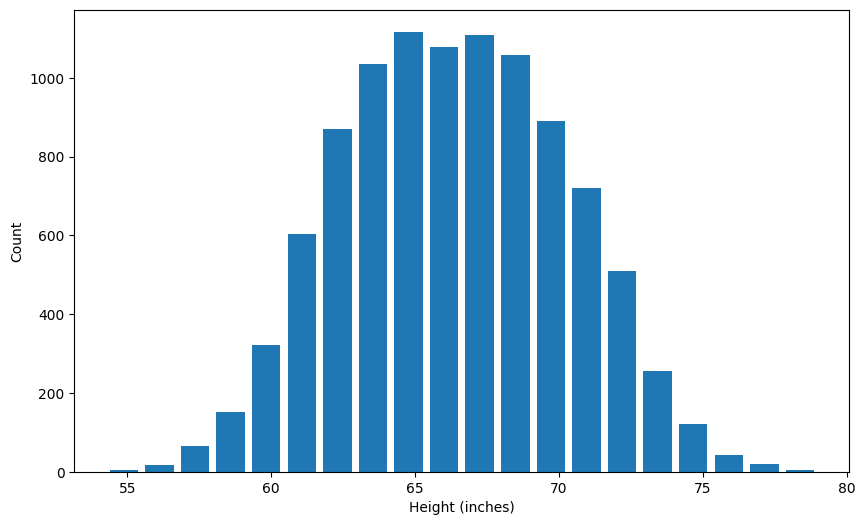

In [175]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

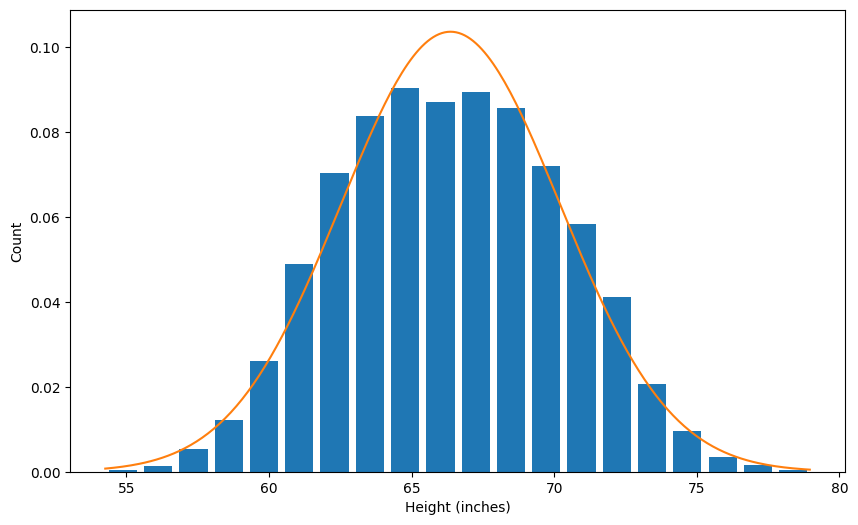

In [176]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [177]:
df.Height.mean()

np.float64(66.36755975482124)

In [178]:
df.Height.std()

3.8475281207732324

In [179]:
df.shape

(10000, 3)

Removing outliers using standard deviation


In [180]:
upper_limit = df.Height.mean() + 3 * df.Height.std()
lower_limit = df.Height.mean() - 3 * df.Height.std()

In [181]:
upper_limit, lower_limit

(np.float64(77.91014411714094), np.float64(54.82497539250154))

In [182]:
df[(df.Height > upper_limit) | (df.Height < lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [183]:
df_no_outlier_std_dev = df[(df.Height < upper_limit) & (df.Height > lower_limit)].drop(['Weight'], axis='columns')
df_no_outlier_std_dev.shape

(9993, 2)

In [184]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

Romoving Outlier using Z score

In [185]:
df['zscore'] = (df.Height - df.Height.mean()) / df.Height.std()

In [186]:
df = df.drop(['Weight'], axis='columns')

In [187]:
df

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [188]:
df[df['zscore'] > 3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [189]:
df[df['zscore'] < -3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [190]:
df[(df.zscore < -3) | (df.zscore > 3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [191]:
df1 = df[(df.zscore < 3) & (df.zscore > -3)]
df1.shape

(9993, 3)

In [192]:
df_no_outlier = df[(df.zscore < 3) & (df.zscore > -3)]
df_no_outlier.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


# Exercise 3

In [18]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [19]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [20]:
df.shape

(13200, 7)

In [21]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [22]:
df = df.drop(['size', 'total_sqft', 'bath', 'price', 'bhk'], axis='columns')
df

,location,price_per_sqft
0,Electronic City Phase II,3699
1,Chikka Tirupathi,4615
2,Uttarahalli,4305
3,Lingadheeranahalli,6245
4,Kothanur,4250
...,...,...
13195,Whitefield,6689
13196,other,11111
13197,Raja Rajeshwari Nagar,5258
13198,Padmanabhanagar,10407


In [23]:
min, max = df.price_per_sqft.quantile([0.001, 0.999])
min, max

(1366.184, 50959.36200000098)

In [24]:
df1 = df[(df.price_per_sqft < max) & (df.price_per_sqft > min)]
df1

,location,price_per_sqft
0,Electronic City Phase II,3699
1,Chikka Tirupathi,4615
2,Uttarahalli,4305
3,Lingadheeranahalli,6245
4,Kothanur,4250
...,...,...
13195,Whitefield,6689
13196,other,11111
13197,Raja Rajeshwari Nagar,5258
13198,Padmanabhanagar,10407


In [25]:
df.shape[0] - df1.shape[0]

28

In [26]:
min = df1.price_per_sqft.mean() - 4 * df1.price_per_sqft.std()
max = df1.price_per_sqft.mean() + 4 * df1.price_per_sqft.std()
min, max

(np.float64(-9900.429065502549), np.float64(23227.73653589429))

In [27]:
df1[(df1.price_per_sqft < min) | (df1.price_per_sqft > max)]

,location,price_per_sqft
9,other,36274
45,HSR Layout,33333
190,Bellandur,27083
733,Cunningham Road,23719
760,other,31666
...,...,...
13081,other,35000
13094,other,27083
13127,other,27083
13185,Hulimavu,44000


In [28]:
df2 = df1[(df1.price_per_sqft < max) & (df1.price_per_sqft > min)]
df2.head()

,location,price_per_sqft
0,Electronic City Phase II,3699
1,Chikka Tirupathi,4615
2,Uttarahalli,4305
3,Lingadheeranahalli,6245
4,Kothanur,4250


In [29]:
df2.shape

(13047, 2)

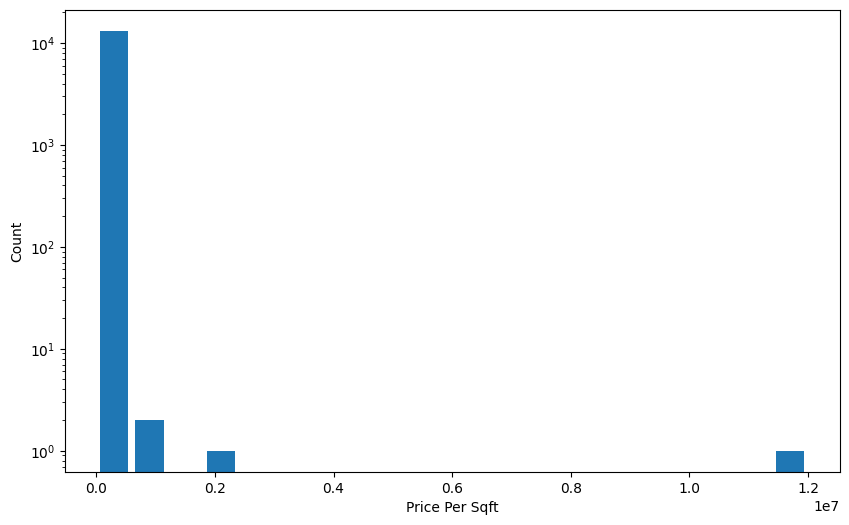

In [40]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [31]:
# from scipy.stats import norm
# import numpy as np

# plt.hist(df2.price_per_sqft, bins=5, rwidth=0.8, density=True)
# plt.xlabel('Price Per Sqft')
# plt.ylabel('Count')


# rng = np.arange(df.price_per_sqft.min(), df.price_per_sqft.max(), 0.1)
# plt.plot(rng, norm.pdf(rng,df.price_per_sqft.mean(),df.price_per_sqft.std()))

In [34]:
df1.loc[:, 'zscore'] = (df1.price_per_sqft - df1.price_per_sqft.mean()) / df1.price_per_sqft.std()


In [35]:
df1

,location,price_per_sqft,zscore
0,Electronic City Phase II,3699,-0.715923
1,Chikka Tirupathi,4615,-0.494722
2,Uttarahalli,4305,-0.569583
3,Lingadheeranahalli,6245,-0.101099
4,Kothanur,4250,-0.582864
...,...,...,...
13195,Whitefield,6689,0.006121
13196,other,11111,1.073973
13197,Raja Rajeshwari Nagar,5258,-0.339446
13198,Padmanabhanagar,10407,0.903967


In [37]:
df_no_outliers = df1[(df1.zscore>-4) & (df1.zscore<4)]
df_no_outliers.head()

,location,price_per_sqft,zscore
0,Electronic City Phase II,3699,-0.715923
1,Chikka Tirupathi,4615,-0.494722
2,Uttarahalli,4305,-0.569583
3,Lingadheeranahalli,6245,-0.101099
4,Kothanur,4250,-0.582864


In [38]:
df_no_outliers.shape

(13047, 3)

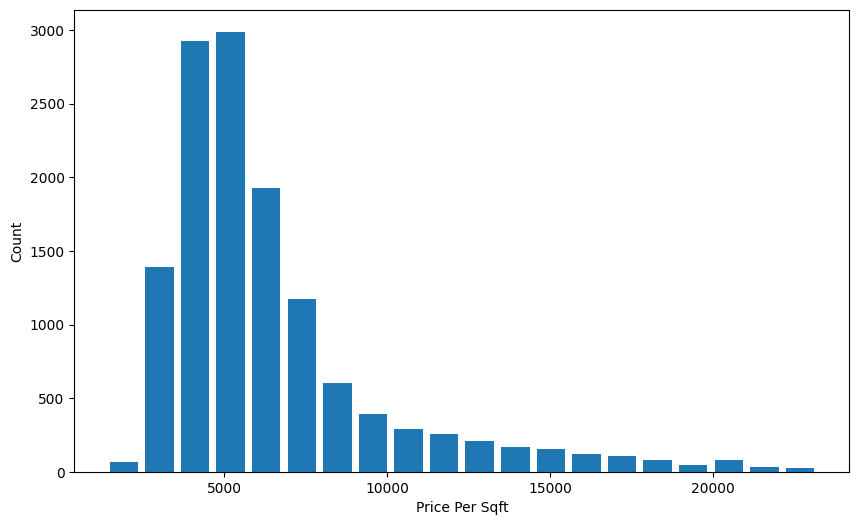

In [42]:
plt.hist(df_no_outliers.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')
# plt.yscale('log')
plt.show()

# Video 4 - Outlier detection and removal using IQR

In [43]:
import pandas as pd

In [47]:
df = pd.read_csv('heights (2).csv')
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [48]:
df.shape

(20, 2)

In [49]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [50]:
q1 = df.height.quantile(0.25)
q3 = df.height.quantile(0.75)
q1, q3

(np.float64(5.3500000000000005), np.float64(6.275))

In [52]:
iqr = q3 - q1
iqr

np.float64(0.9249999999999998)

In [53]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
lower_limit, upper_limit

(np.float64(3.962500000000001), np.float64(7.6625))

In [54]:
df[(df.height < lower_limit) | (df.height > upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [55]:
df_no_outliner = df[(df.height > lower_limit) & (df.height < upper_limit)]

# Exercise 4

In [56]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (10,6)

In [57]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [61]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


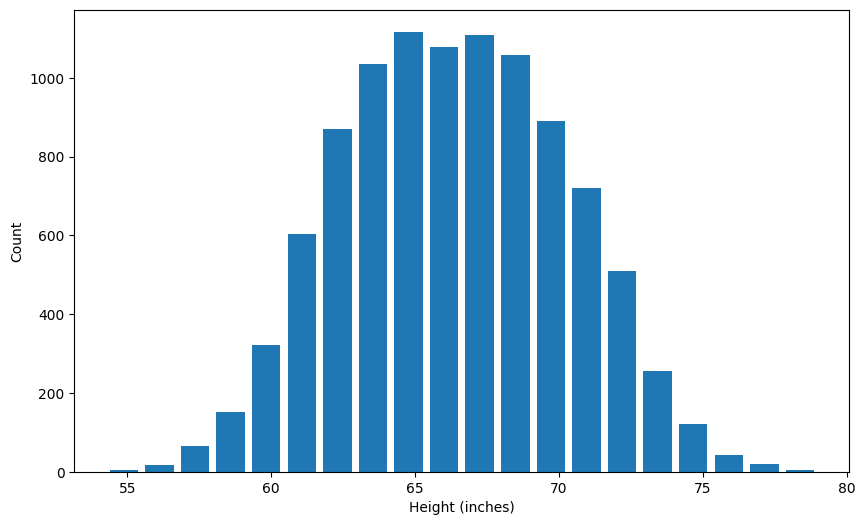

In [58]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

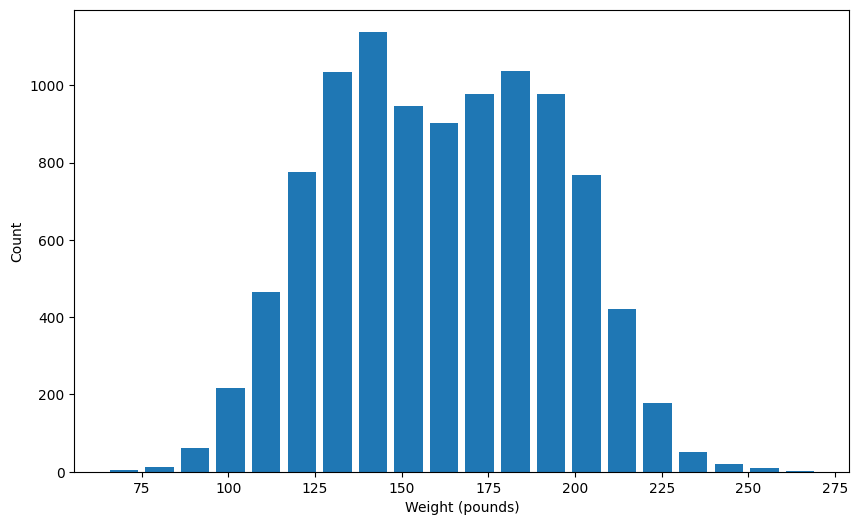

In [59]:
plt.hist(df.Weight, bins=20, rwidth=0.8)
plt.xlabel('Weight (pounds)')
plt.ylabel('Count')
plt.show()
#

In [62]:
q1_h = df.Height.quantile(0.25)
q3_h = df.Height.quantile(0.75)

q1_h, q3_h

(np.float64(63.505620481218955), np.float64(69.1742617268347))

In [63]:
iqr_h = q3_h - q1_h
iqr_h

np.float64(5.668641245615746)

In [64]:
lower_h = q1_h - 1.5 * iqr_h
upper_h = q3_h + 1.5 * iqr_h

In [65]:
df[(df.Height < lower_h) | (df.Height > upper_h)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [66]:
df_no_outlier_h = df[(df.Height > lower_h) & (df.Height < upper_h)]
df_no_outlier_h


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [69]:
df.Weight.describe()

,Weight
count,10000.000000
mean,161.440357
std,32.108439
min,64.700127
25%,135.818051
50%,161.212928
75%,187.169525
max,269.989699


In [67]:
q1_w = df.Weight.quantile(0.25)
q3_w = df.Weight.quantile(0.75)

q1_w, q3_w

(np.float64(135.8180513055015), np.float64(187.16952486868348))

In [70]:
iqr_w = q3_w - q1_w
iqr_w

np.float64(51.35147356318197)

In [71]:
lower_w = q1_w - 1.5 * iqr_w
upper_w = q3_w + 1.5 * iqr_w

In [72]:
df[(df.Weight < lower_w) | (df.Weight > upper_w)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [73]:
df_no_outlier_w = df[(df.Weight > lower_w) & (df.Weight < upper_w)]
df_no_outlier_w


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
